In [7]:
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
from scipy.stats import linregress

In [8]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [9]:
from config.api_keys import weather_api_key
from citipy import citipy

output_data_file = "output_data/cities.csv"

# Note that I deleted the folder and file with my API key after I finished my work so that I don't accidentally spoil it.

In [10]:
lat_range = (-90, 90)
lng_range = (-180, 180)

In [11]:
lat_lng = []
cities = []

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    if city not in cities:
        cities.append(city)

len(cities)        

569

In [17]:
Cnames = []
country = []
Clat = []
Clng = []
temp = []
humidity = []
cloudiness = []
wind = []

In [18]:
count = 1
print('Acquiring data')
print('--------------------------')

for city in cities:
    url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial'
    response = requests.get(url).json()
    print(f'Working on {city} : (number{count})')
    
    try:
        Cnames.append(response['name'])
        country.append(response['sys']['country'])
        Clat.append(response['coord']['lat'])
        Clng.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])        
        
    except KeyError:
        print(f'error retrieving {city}, next')
        
    count += 1
    
print('Process complete')        

Acquiring data
--------------------------
Working on alofi : (number1)
Working on albany : (number2)
Working on norman wells : (number3)
Working on kastamonu : (number4)
Working on hermanus : (number5)
Working on tabiauea : (number6)
error retrieving tabiauea, next
Working on nikolskoye : (number7)
Working on sao joao da barra : (number8)
Working on ushuaia : (number9)
Working on udarnyy : (number10)
Working on butaritari : (number11)
Working on puerto ayora : (number12)
Working on jamestown : (number13)
Working on half moon bay : (number14)
Working on souillac : (number15)
Working on popova : (number16)
Working on tsihombe : (number17)
error retrieving tsihombe, next
Working on mataura : (number18)
Working on yellowknife : (number19)
Working on tigil : (number20)
Working on samalaeulu : (number21)
error retrieving samalaeulu, next
Working on bluff : (number22)
Working on atuona : (number23)
Working on kiruna : (number24)
Working on punta arenas : (number25)
Working on busselton : (num

In [91]:
weather_dic = {'City' : Cnames,
               'Country' : country,
               'Latitude' : Clat,
               'Longitude' : Clng,
               'Temperature (F)' : temp,
               'Humidity (%)' : humidity,
               'Cloudiness (%)' : cloudiness,
               'Wind Speed (mph)' : wind}

weather_df = pd.DataFrame(weather_dic)

#weather_df.to_csv('../Outputs/All_Cities.csv')

weather_df

,City,Country,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Alofi,NU,-19.06,-169.92,84.20,66,75,13.87
1,Albany,US,42.60,-73.97,46.40,42,75,13.87
2,Norman Wells,CA,65.28,-126.83,23.00,73,75,17.22
3,Kastamonu Province,TR,41.50,33.67,41.32,66,100,2.73
4,Hermanus,ZA,-34.42,19.23,48.00,97,1,6.04
...,...,...,...,...,...,...,...,...
518,São Félix do Xingu,BR,-6.64,-51.99,73.83,89,76,0.83
519,Santa Cruz de La Palma,ES,28.68,-17.76,66.20,63,90,8.05
520,Lapeer,US,43.05,-83.32,37.40,44,75,14.99
521,Mizdah,LY,31.45,12.98,63.25,34,0,6.46


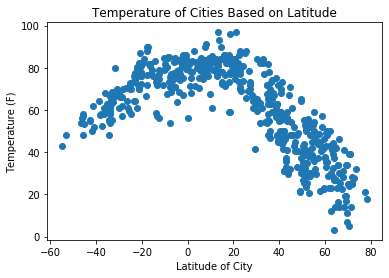

In [78]:
xL_values = weather_df['Latitude']
yT_values = weather_df['Temperature (F)']
plt.scatter(xL_values, yT_values)

plt.xlabel('Latitude of City')
plt.ylabel('Temperature (F)')
plt.title('Temperature of Cities Based on Latitude')

#plt.savefig('../Outputs/All_Temperature.png')

# As one might expect, temperatures get higher the closer you get to the equator (Latitude 0).  Pretty even arch it seems.
# The code is just pulling the latitude and temperatures to scatter.

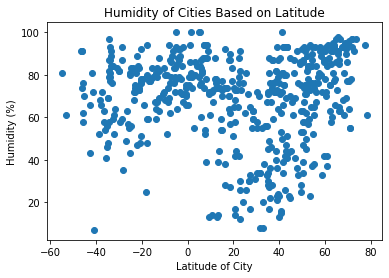

In [79]:
yH_values = weather_df['Humidity (%)']
plt.scatter(xL_values, yH_values)

plt.xlabel('Latitude of City')
plt.ylabel('Humidity (%)')
plt.title('Humidity of Cities Based on Latitude')

#plt.savefig('../Outputs/All_Humidity.png')

# I can't see much of a correlation between the two.  Suppose I could measure it, but the eyeball test says unrelated.
# The code pulled the humidity and latitudes of the cities for scattering.

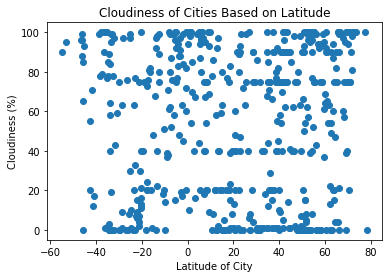

In [80]:
yC_values = weather_df['Cloudiness (%)']
plt.scatter(xL_values, yC_values)

plt.xlabel('Latitude of City')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness of Cities Based on Latitude')

#plt.savefig('../Outputs/All_Cloudiness.png')

# The last graph seemed unrelated, but this one blows it out of the water.  This thing is essentially just a square!
# Code gets cloudiness and latitude.

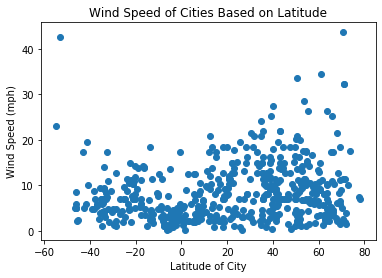

In [81]:
yW_values = weather_df['Wind Speed (mph)']
plt.scatter(xL_values, yW_values)

plt.xlabel('Latitude of City')
plt.ylabel('Wind Speed (mph)')
plt.title('Wind Speed of Cities Based on Latitude')

#plt.savefig('../Outputs/All_WindSpeed.png')

# Seems pretty consistent in the middle with some high outliers once you get really far from the equator.
# Code make wind speed and latitude go pop.

In [92]:
north_df = weather_df.copy()
north_df = north_df[north_df['Latitude'] > 0]

#north_df.to_csv('../Outputs/North_Cities.csv')

north_df

,City,Country,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
1,Albany,US,42.60,-73.97,46.40,42,75,13.87
2,Norman Wells,CA,65.28,-126.83,23.00,73,75,17.22
3,Kastamonu Province,TR,41.50,33.67,41.32,66,100,2.73
5,Nikolskoye,RU,59.70,30.79,46.40,42,37,13.42
8,Udarnyy,RU,54.34,42.86,37.38,90,100,17.54
...,...,...,...,...,...,...,...,...
517,Bonthe,SL,7.53,-12.51,80.51,88,95,5.32
519,Santa Cruz de La Palma,ES,28.68,-17.76,66.20,63,90,8.05
520,Lapeer,US,43.05,-83.32,37.40,44,75,14.99
521,Mizdah,LY,31.45,12.98,63.25,34,0,6.46


In [93]:
south_df = weather_df.copy()
south_df = south_df[south_df['Latitude'] < 0]

#south_df.to_csv('../Outputs/South_Cities.csv')

south_df

# My number of rows in the north and south dataframes is equal to the whole dataframe which is good.

,City,Country,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Alofi,NU,-19.06,-169.92,84.20,66,75,13.87
4,Hermanus,ZA,-34.42,19.23,48.00,97,1,6.04
6,São João da Barra,BR,-21.64,-41.05,71.89,84,6,7.63
7,Ushuaia,AR,-54.80,-68.30,42.80,81,90,23.04
10,Puerto Ayora,EC,-0.74,-90.35,86.00,66,20,17.22
...,...,...,...,...,...,...,...,...
497,Nelson Bay,AU,-32.72,152.15,66.20,59,0,17.22
507,Tambopata,PE,-12.73,-69.18,79.09,69,89,2.55
510,Delmas,ZA,-26.15,28.68,61.00,57,0,4.43
512,Auki,SB,-8.77,160.70,85.26,67,38,3.06


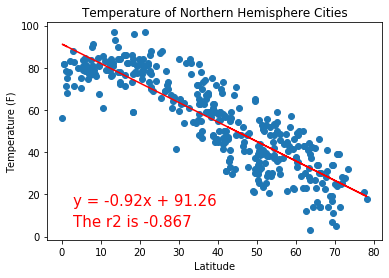

In [82]:
xN_values = north_df['Latitude']
yNT_values = north_df['Temperature (F)']
plt.scatter(xN_values, yNT_values)

(slope, intercept, rvalue, pvalue, stderr) = linregress(xN_values, yNT_values)
rvNT = xN_values * slope + intercept
lineNT = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(xN_values, rvNT, "r-")
plt.annotate(lineNT, (3, 15), fontsize=15, color="red")
plt.annotate(f'The r2 is {round(rvalue, 3)}', (3, 5), fontsize=15, color='red')

plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Temperature of Northern Hemisphere Cities')

#plt.savefig('../Outputs/North_Temperature.png')

# As we saw earlier, the farther you get from the equator (Latitude = 0) the lower the temperature gets.

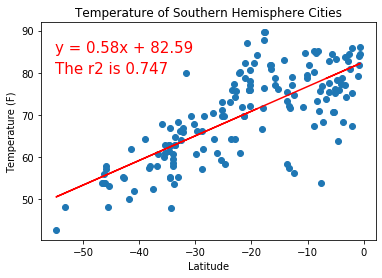

In [83]:
xS_values = south_df['Latitude']
yST_values = south_df['Temperature (F)']
plt.scatter(xS_values, yST_values)

(slope, intercept, rvalue, pvalue, stderr) = linregress(xS_values, yST_values)
rvST = xS_values * slope + intercept
lineST = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(xS_values, rvST, "r-")
plt.annotate(lineST, (-55, 85), fontsize=15, color="red")
plt.annotate(f'The r2 is {round(rvalue, 3)}', (-55, 80), fontsize=15, color='red')

plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Temperature of Southern Hemisphere Cities')

#plt.savefig('../Outputs/South_Temperature.png')

# Same as before except it looks funny because 0 Latitude is on the right.  Farther from 0 means lower temps.
# Interestingly the r2 is a little bit lower.  Would be curious if everyone else got the same in their books.

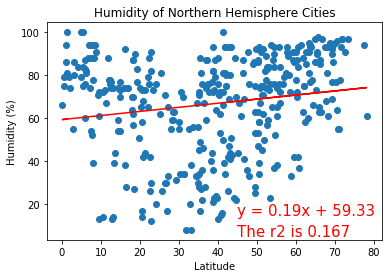

In [84]:
yNH_values = north_df['Humidity (%)']
plt.scatter(xN_values, yNH_values)

(slope, intercept, rvalue, pvalue, stderr) = linregress(xN_values, yNH_values)
rvNH = xN_values * slope + intercept
lineNH = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(xN_values, rvNH, "r-")
plt.annotate(lineNH, (45, 15), fontsize=15, color="red")
plt.annotate(f'The r2 is {round(rvalue, 3)}', (45, 5), fontsize=15, color='red')

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity of Northern Hemisphere Cities')

#plt.savefig('../Outputs/North_Humidity.png')

# Humidity seems to go up the farther from the equator you get, but it's not that strong of a relationship.
# Possibly just random noise.  Again I'd like to see it compared to other people's books.

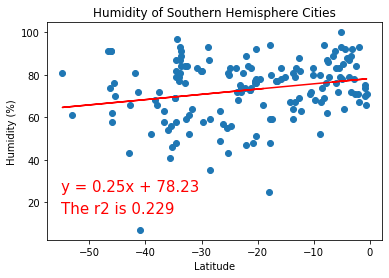

In [85]:
ySH_values = south_df['Humidity (%)']
plt.scatter(xS_values, ySH_values)

(slope, intercept, rvalue, pvalue, stderr) = linregress(xS_values, ySH_values)
rvSH = xS_values * slope + intercept
lineSH = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(xS_values, rvSH, "r-")
plt.annotate(lineSH, (-55, 25), fontsize=15, color="red")
plt.annotate(f'The r2 is {round(rvalue, 3)}', (-55, 15), fontsize=15, color='red')

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity of Southern Hemisphere Cities')

plt.savefig('../Outputs/South_Humidity.png')

# In this case the humidity is going down as you get farther from the equator.
# The relationship is pretty weak but not as much so as the Northern hemisphere one.
# Seeing that it's the opposite of the Northern one I'm inclined to guess that latitude doesn't matter much to humidity.

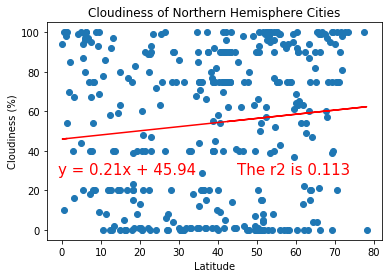

In [86]:
yNC_values = north_df['Cloudiness (%)']
plt.scatter(xN_values, yNC_values)

(slope, intercept, rvalue, pvalue, stderr) = linregress(xN_values, yNC_values)
rvNC = xN_values * slope + intercept
lineNC = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(xN_values, rvNC, "r-")
plt.annotate(lineNC, (-1, 28), fontsize=15, color="red")
plt.annotate(f'The r2 is {round(rvalue, 3)}', (45, 28), fontsize=15, color='red')

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness of Northern Hemisphere Cities')

#plt.savefig('../Outputs/North_Cloudiness.png')

# Cloudiness goes up a bit as you leave the equator but it's another weak relationship.
# Might check cloudiness against humidity later on to see if they relate at all.

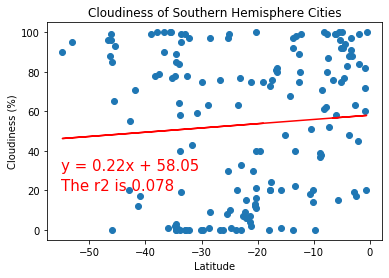

In [87]:
ySC_values = south_df['Cloudiness (%)']
plt.scatter(xS_values, ySC_values)

(slope, intercept, rvalue, pvalue, stderr) = linregress(xS_values, ySC_values)
rvSC = xS_values * slope + intercept
lineSC = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(xS_values, rvSC, "r-")
plt.annotate(lineSC, (-55, 30), fontsize=15, color="red")
plt.annotate(f'The r2 is {round(rvalue, 3)}', (-55, 20), fontsize=15, color='red')

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness of Southern Hemisphere Cities')

#plt.savefig('../Outputs/South_Cloudiness.png')

# This one says cloudiness goes down as you leave the equator.
# Opposite of the Northern results, but similar to the Humidity plots.
# Makes me more curious about Humidity and Cloudiness.

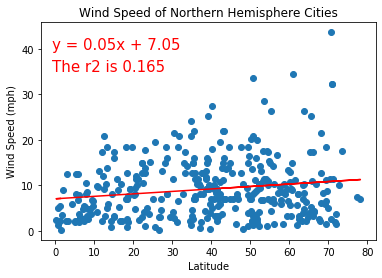

In [88]:
yNW_values = north_df['Wind Speed (mph)']
plt.scatter(xN_values, yNW_values)

(slope, intercept, rvalue, pvalue, stderr) = linregress(xN_values, yNW_values)
rvNW = xN_values * slope + intercept
lineNW = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(xN_values, rvNW, "r-")
plt.annotate(lineNW, (-1, 40), fontsize=15, color="red")
plt.annotate(f'The r2 is {round(rvalue, 3)}', (-1, 35), fontsize=15, color='red')

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Wind Speed of Northern Hemisphere Cities')

#plt.savefig('../Outputs/North_WindSpeed.png')

# Wind speed slightly increases as you go north of the equator.  Not a strong relationship.
# The biggest outliers are all at the far northern end.

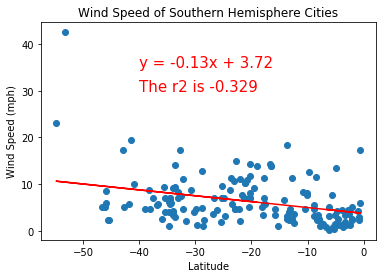

In [89]:
ySW_values = south_df['Wind Speed (mph)']
plt.scatter(xS_values, ySW_values)

(slope, intercept, rvalue, pvalue, stderr) = linregress(xS_values, ySW_values)
rvSW = xS_values * slope + intercept
lineSW = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(xS_values, rvSW, "r-")
plt.annotate(lineSW, (-40, 35), fontsize=15, color="red")
plt.annotate(f'The r2 is {round(rvalue, 3)}', (-40, 30), fontsize=15, color='red')

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Wind Speed of Southern Hemisphere Cities')

#plt.savefig('../Outputs/South_WindSpeed.png')

# Wind speed increases as you go south of the equator as well.
# Still not a very strong relatinship but it is noticably stronger than the Northern one.
# The biggest outlier again came from cities farthest away from the equator.

In [ ]:
# END